# Бизнес-цели:

Классификация: Предсказать вероятность инсульта на основе данных пациента.

In [13]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Загрузка данных
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(df.columns)
print(df)
df = df.drop(['gender', 'ever_married', 'heart_disease'], axis=1)

# Обработка пропущенных значений
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

# Удаление столбца 'id' и целевой переменной 'stroke'
X = df.drop(['id', 'stroke'], axis=1)

# Преобразование категориальных переменных
categorical_features = ['work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'hypertension', 'avg_glucose_level', 'bmi']

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Fem

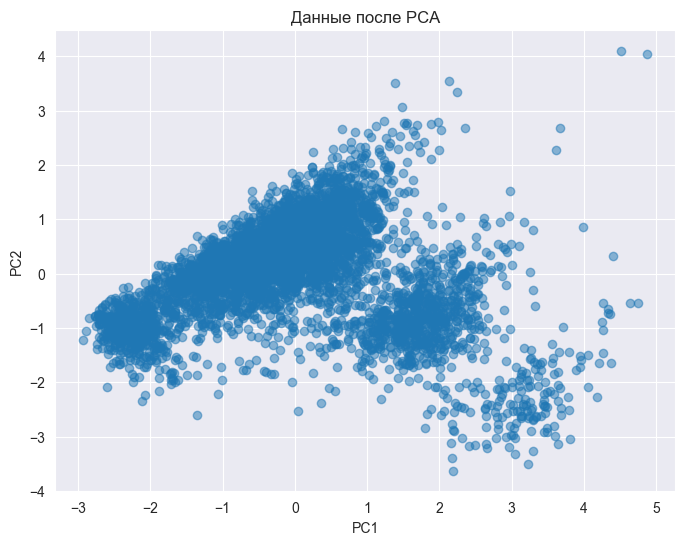

In [14]:
# Создание ColumnTransformer для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Преобразование данных
X_scaled = preprocessor.fit_transform(X)

# Понижение размерности с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация данных после PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Данные после PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

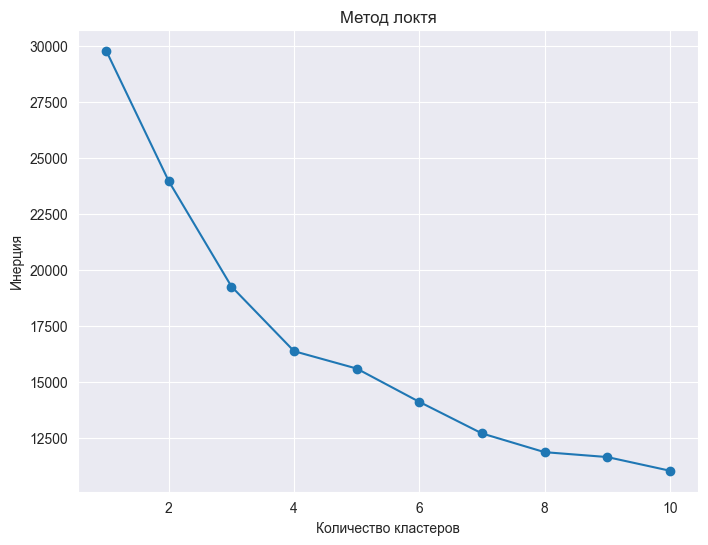

In [15]:
# Определение оптимального количества кластеров с помощью метода локтя
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

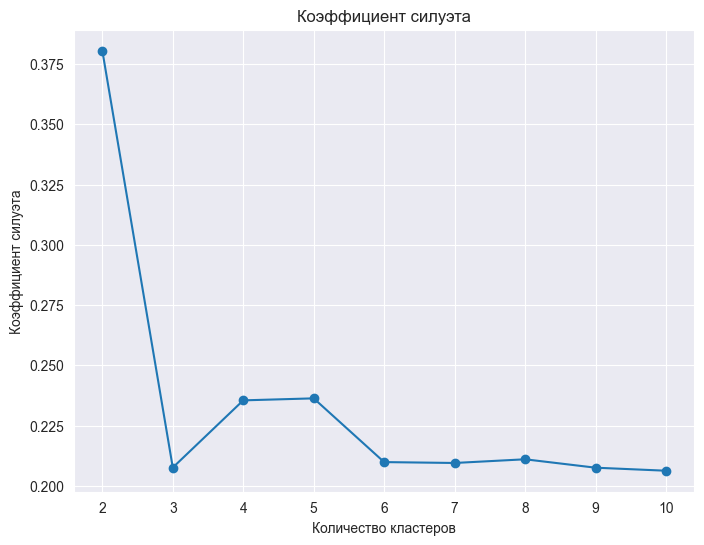

In [16]:
# Определение оптимального количества кластеров с помощью коэффициента силуэта
silhouette_scores = []
for k in range(2, 11):  # Коэффициент силуэта не определен для k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Визуализация коэффициента силуэта
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()

In [17]:
# Кластеризация с использованием K-Means
optimal_k = 3  # Выберите оптимальное количество кластеров на основе графиков
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [18]:
# Кластеризация с использованием Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(X_scaled)

Text(0, 0.5, 'PC2')

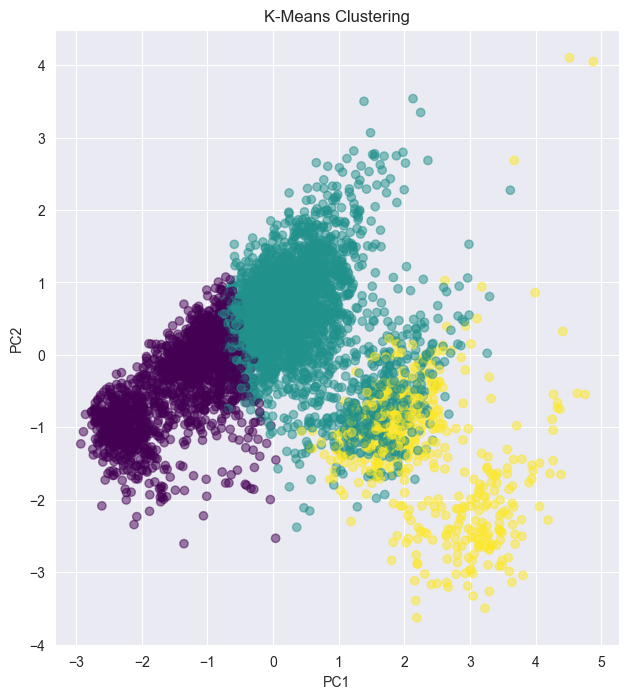

In [19]:
# Визуализация результатов кластеризации
plt.figure(figsize=(16, 8))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

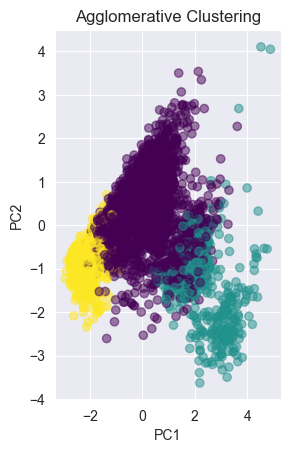

In [20]:
# Agglomerative Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [21]:
# Оценка качества кластеризации
print("Коэффициент силуэта для K-Means:", silhouette_score(X_scaled, kmeans_labels))
print("Коэффициент силуэта для Agglomerative Clustering:", silhouette_score(X_scaled, agg_labels))

Коэффициент силуэта для K-Means: 0.20758611793922405
Коэффициент силуэта для Agglomerative Clustering: 0.23799044339356212
